In [1]:
#https://www.kaggle.com/neoyipeng2018/bert-fastai-inc-error-analysis
#https://www.kaggle.com/wanyizhu2017/quora-insincere-question-with-lightgbm?scriptVersionId=17740120 (default weightage)

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix, f1_score

In [3]:
ulm = pd.read_csv('ulmfit.csv')
ulm = ulm.rename(columns={'label':'label_gt','label_pred':'ulm_pred', 'sincere_pred':'ulm_sincere_pred', 'insincere_pred':'ulm_insincere_pred'})

ulm.head(1)

,Unnamed: 0,index,label_gt,text,qid,ulm_sincere_pred,ulm_insincere_pred,ulm_pred
0,0,1044897,0,What major political events happened in the 19...,ccbefed661cdb0cc194a,0.999116,0.000885,0


In [4]:
bert = pd.read_csv('bert_error_analysis.csv', encoding = "ISO-8859-1")
bert = bert.rename(columns={'label_pred':'bert_pred', 'sincere_pred':'bert_sincere_pred', 'insincere_pred':'bert_insincere_pred'})

bert = bert.drop('label_gt', axis=1)

bert.head(1)

,bert_pred,bert_insincere_pred,bert_sincere_pred,text
0,0,0.001103,0.998901,What major political events happened in the 19...


In [5]:
lgb = pd.read_csv('wy_result_default.csv')
lgb = lgb.rename(columns={'question_text':'text','pred_label':'lgb_pred', 'proba_0':'lgb_sincere_pred', 'proba_1':'lgb_insincere_pred'})

lgb.head(1)

,qid,text,target,lgb_pred,lgb_sincere_pred,lgb_insincere_pred
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,0,0.912408,0.087592


In [6]:
combined_process1 = pd.merge(ulm, bert, how='left', on = 'text')
combined_final = pd.merge(combined_process1, lgb, how='left', on = 'text')
combined_final = combined_final.drop('Unnamed: 0', axis = 1)

#combined_final['bert_pred'].apply(lambda x: int(x))

combined_final.head(1)

,index,label_gt,text,qid_x,ulm_sincere_pred,ulm_insincere_pred,ulm_pred,bert_pred,bert_insincere_pred,bert_sincere_pred,qid_y,target,lgb_pred,lgb_sincere_pred,lgb_insincere_pred
0,1044897,0,What major political events happened in the 19...,ccbefed661cdb0cc194a,0.999116,0.000885,0,0.0,0.001103,0.998901,ccbefed661cdb0cc194a,0.0,0.0,0.996765,0.003235


In [7]:
combined_final = combined_final.dropna()
combined_final['ulm_pred'] = combined_final['ulm_pred'].apply(lambda x: int(x))
combined_final['bert_pred'] = combined_final['bert_pred'].apply(lambda x: int(x))
combined_final['lgb_pred'] = combined_final['lgb_pred'].apply(lambda x: int(x))
combined_final

,index,label_gt,text,qid_x,ulm_sincere_pred,ulm_insincere_pred,ulm_pred,bert_pred,bert_insincere_pred,bert_sincere_pred,qid_y,target,lgb_pred,lgb_sincere_pred,lgb_insincere_pred
0,1044897,0,What major political events happened in the 19...,ccbefed661cdb0cc194a,0.999116,0.000885,0,0,0.001103,0.998901,ccbefed661cdb0cc194a,0.0,0,0.996765,0.003235
1,1044898,0,Are burgeois watches good?,ccbf26634fb4e89b4dbb,0.996327,0.003673,0,0,0.009936,0.989870,ccbf26634fb4e89b4dbb,0.0,0,0.993688,0.006312
2,1044899,0,Was the T-34 a quantity over quality tank?,ccbf348a8d20557e94fb,0.994041,0.005959,0,0,0.003235,0.996864,ccbf348a8d20557e94fb,0.0,0,0.987825,0.012175
3,1044900,0,If a mass will travel with velocity of light t...,ccbf40df6506d3a7b325,0.999878,0.000122,0,0,0.001099,0.998893,ccbf40df6506d3a7b325,0.0,0,0.997458,0.002542
4,1044901,0,How come Gaara is so much stronger than Shino ...,ccbf4ee4637268fd3144,0.998619,0.001381,0,0,0.001668,0.998339,ccbf4ee4637268fd3144,0.0,0,0.983926,0.016074
5,1044902,0,Do we get influenced from other countries abou...,ccbf54f243d8e33d3870,0.988888,0.011112,0,0,0.001156,0.998840,ccbf54f243d8e33d3870,0.0,0,0.985199,0.014801
6,1044903,0,Which is the best book for forensic medicine i...,ccbf57a74be46cf547ff,0.996178,0.003822,0,0,0.001099,0.998897,ccbf57a74be46cf547ff,0.0,0,0.996869,0.003131
7,1044904,0,What is the main purpose of memorandum of asso...,ccbf5a5527704f6b5bd8,0.998829,0.001171,0,0,0.001103,0.998897,ccbf5a5527704f6b5bd8,0.0,0,0.999530,0.000470
8,1044905,0,What would happen to Saturn's rings if they sl...,ccbf85035e8d21c65711,0.999623,0.000377,0,0,0.001099,0.998893,ccbf85035e8d21c65711,0.0,0,0.993251,0.006749
9,1044906,0,How do I get Chris Hemsworth to have a meeting...,ccbfabf02f5c164bad9e,0.998246,0.001754,0,0,0.001507,0.998481,ccbfabf02f5c164bad9e,0.0,0,0.992738,0.007262


In [8]:
combined_final['lgb_if_correct'] = np.where(combined_final['lgb_pred']== combined_final['label_gt'], 1, 0)
combined_final['ulm_if_correct'] = np.where(combined_final['ulm_pred']== combined_final['label_gt'], 1, 0)
combined_final['bert_if_correct'] = np.where(combined_final['bert_pred']== combined_final['label_gt'], 1, 0)

In [17]:
combined_final = combined_final[['text','label_gt', 'lgb_pred', 'ulm_pred', 'bert_pred', 'lgb_if_correct', 'ulm_if_correct', 'bert_if_correct', 'lgb_sincere_pred', 'ulm_sincere_pred', 'bert_sincere_pred', 'lgb_insincere_pred', 'ulm_insincere_pred', 'bert_insincere_pred']].reset_index()
#, 'lgb_sincere_pred', 'ulm_sincere_pred', 'bert_sincere_pred', 'lgb_insincere_pred', 'ulm_insincere_pred', 'bert_insincere_pred'
combined_final.head(30)

,index,text,label_gt,lgb_pred,ulm_pred,bert_pred,lgb_if_correct,ulm_if_correct,bert_if_correct,lgb_sincere_pred,ulm_sincere_pred,bert_sincere_pred,lgb_insincere_pred,ulm_insincere_pred,bert_insincere_pred
0,0,What major political events happened in the 19...,0,0,0,0,1,1,1,0.996765,0.999116,0.998901,0.003235,0.000885,0.001103
1,1,Are burgeois watches good?,0,0,0,0,1,1,1,0.993688,0.996327,0.989870,0.006312,0.003673,0.009936
2,2,Was the T-34 a quantity over quality tank?,0,0,0,0,1,1,1,0.987825,0.994041,0.996864,0.012175,0.005959,0.003235
3,3,If a mass will travel with velocity of light t...,0,0,0,0,1,1,1,0.997458,0.999878,0.998893,0.002542,0.000122,0.001099
4,4,How come Gaara is so much stronger than Shino ...,0,0,0,0,1,1,1,0.983926,0.998619,0.998339,0.016074,0.001381,0.001668
5,5,Do we get influenced from other countries abou...,0,0,0,0,1,1,1,0.985199,0.988888,0.998840,0.014801,0.011112,0.001156
6,6,Which is the best book for forensic medicine i...,0,0,0,0,1,1,1,0.996869,0.996178,0.998897,0.003131,0.003822,0.001099
7,7,What is the main purpose of memorandum of asso...,0,0,0,0,1,1,1,0.999530,0.998829,0.998897,0.000470,0.001171,0.001103
8,8,What would happen to Saturn's rings if they sl...,0,0,0,0,1,1,1,0.993251,0.999623,0.998893,0.006749,0.000377,0.001099
9,9,How do I get Chris Hemsworth to have a meeting...,0,0,0,0,1,1,1,0.992738,0.998246,0.998481,0.007262,0.001754,0.001507


In [20]:
i=20
combined_final['lgb_pred'][i] + combined_final['ulm_pred'][i] + combined_final['bert_pred'][i]

0

In [25]:
num_row = len(combined_final)
comb_pred=np.zeros(num_row,  dtype=int)

for i in range(num_row):
    if combined_final.iloc[i]['lgb_pred'] + combined_final.iloc[i]['ulm_pred'] + combined_final.iloc[i]['bert_pred'] >= 2:
        comb_pred[i] = 1
    else:
        comb_pred[i] = 0

combined_final['comb_pred']=comb_pred.tolist()
combined_final.head()

,index,text,label_gt,lgb_pred,ulm_pred,bert_pred,lgb_if_correct,ulm_if_correct,bert_if_correct,lgb_sincere_pred,ulm_sincere_pred,bert_sincere_pred,lgb_insincere_pred,ulm_insincere_pred,bert_insincere_pred,comb_pred
0,0,What major political events happened in the 19...,0,0,0,0,1,1,1,0.996765,0.999116,0.998901,0.003235,0.000885,0.001103,0
1,1,Are burgeois watches good?,0,0,0,0,1,1,1,0.993688,0.996327,0.989870,0.006312,0.003673,0.009936,0
2,2,Was the T-34 a quantity over quality tank?,0,0,0,0,1,1,1,0.987825,0.994041,0.996864,0.012175,0.005959,0.003235,0
3,3,If a mass will travel with velocity of light t...,0,0,0,0,1,1,1,0.997458,0.999878,0.998893,0.002542,0.000122,0.001099,0
4,4,How come Gaara is so much stronger than Shino ...,0,0,0,0,1,1,1,0.983926,0.998619,0.998339,0.016074,0.001381,0.001668,0


In [ ]:
#combined_final.to_csv('combined_final.csv')

In [28]:
print ('Light Gradient Boosting')
print(classification_report(combined_final['label_gt'],combined_final['lgb_pred']))
print(confusion_matrix(combined_final['label_gt'],combined_final['lgb_pred']))
print('f1 score', f1_score(combined_final['label_gt'],combined_final['lgb_pred']))

Light Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.97      0.98    240393
           1       0.59      0.74      0.66     15210

   micro avg       0.95      0.95      0.95    255603
   macro avg       0.79      0.86      0.82    255603
weighted avg       0.96      0.95      0.96    255603

[[232650   7743]
 [  3901  11309]]
f1 score 0.6601482692195435


In [29]:
print ('ULM Fit')
print(classification_report(combined_final['label_gt'],combined_final['ulm_pred']))
print(confusion_matrix(combined_final['label_gt'],combined_final['ulm_pred']))
print('f1 score', f1_score(combined_final['label_gt'],combined_final['ulm_pred']))

ULM Fit
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    240393
           1       0.65      0.72      0.68     15210

   micro avg       0.96      0.96      0.96    255603
   macro avg       0.82      0.85      0.83    255603
weighted avg       0.96      0.96      0.96    255603

[[234634   5759]
 [  4298  10912]]
f1 score 0.6845456541513754


In [27]:
print ('BERT')
print(classification_report(combined_final['label_gt'],combined_final['bert_pred']))
print(confusion_matrix(combined_final['label_gt'],combined_final['bert_pred']))
print('f1 score', f1_score(combined_final['label_gt'],combined_final['bert_pred']))

BERT
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    240393
           1       0.67      0.75      0.71     15210

   micro avg       0.96      0.96      0.96    255603
   macro avg       0.83      0.86      0.84    255603
weighted avg       0.97      0.96      0.96    255603

[[234675   5718]
 [  3803  11407]]
f1 score 0.7055512602443174


In [26]:
print ('Combined')
print(classification_report(combined_final['label_gt'],combined_final['comb_pred']))
print(confusion_matrix(combined_final['label_gt'],combined_final['comb_pred']))
print('f1 score', f1_score(combined_final['label_gt'],combined_final['comb_pred']))

Combined
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    240393
           1       0.68      0.75      0.71     15210

   micro avg       0.96      0.96      0.96    255603
   macro avg       0.83      0.86      0.85    255603
weighted avg       0.97      0.96      0.96    255603

[[234898   5495]
 [  3775  11435]]
f1 score 0.7115743621655258


In [1]:
import seaborn as sns

In [10]:
data = {'Model':['LGB', 'ULMFiT', 'BERT', 'Ensemble'],
        'F1':[0.614,0.684,0.705,0.712]}

df = pd.DataFrame(data)

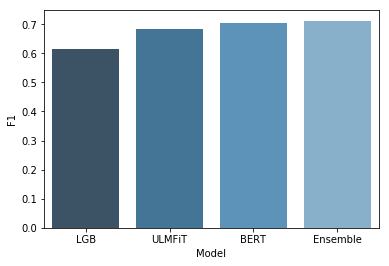

In [17]:
sns.barplot(x="Model", y ="F1", data = df, palette="Blues_d")